# Amazon Products Reviews - Use Case 2

#### by/Alaa Hassan

### NLP Approach to Mining Online Reviews using Topic Modeling 
##### Let’s first load all the necessary libraries:

In [1]:
import nltk
from nltk import FreqDist


In [2]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r'F:\A-W-S\UseCases\Use Case 2\Data\1429_1.csv.zip' ,low_memory=False)


In [4]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmag...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=166",This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmag...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167",great for beginner or experienced person. Bought as a gift and she loves it,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmag...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167","Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...",Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmag...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167",I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime conte...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841

In [5]:
# Drop unnecessary columns
df = df.drop(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful','reviews.sourceURLs','reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],axis=1)

In [6]:
pd.set_option('display.max_columns', 10)
df['reviews.rating'].unique()

array([ 5.,  4.,  2.,  1.,  3., nan])

In [7]:
df['reviews.rating'] = df['reviews.rating'].fillna(0)


In [8]:
df['reviews.text'] = df['reviews.text'].astype('str')

In [9]:
df['reviews.rating'] = df['reviews.rating'].astype('int')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews.rating  34660 non-null  int32 
 1   reviews.text    34660 non-null  object
dtypes: int32(1), object(1)
memory usage: 406.3+ KB


#### Data Preprocessing

In [11]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

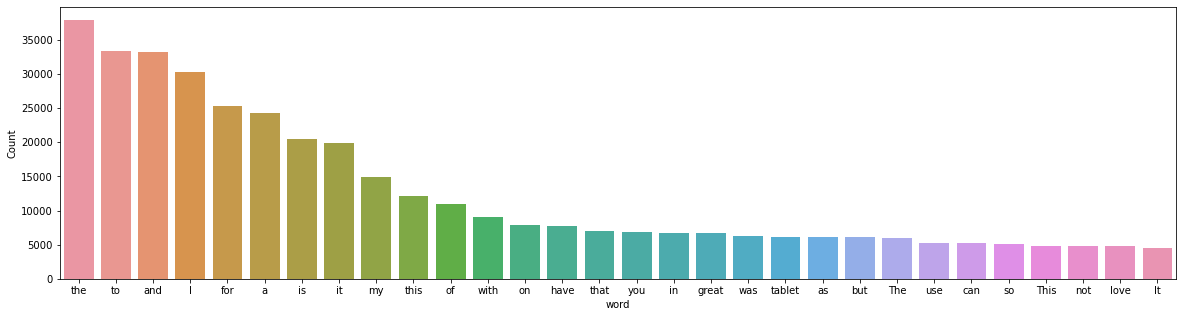

In [12]:
freq_words(df['reviews.text'])


In [13]:
# remove unwanted characters, numbers and symbols
df['reviews.text'] = df['reviews.text'].str.replace("[^a-zA-Z#]", " ")

In [14]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [15]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df['reviews.text'] = df['reviews.text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['reviews.text']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

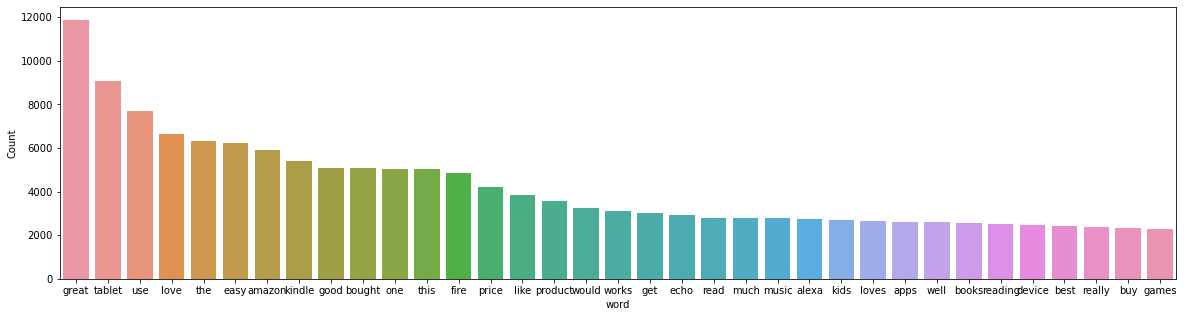

In [16]:
freq_words(reviews, 35)

In [17]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [18]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['great', 'beginner', 'experienced', 'person', 'bought', 'gift', 'loves']


In [19]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['person', 'gift', 'love']


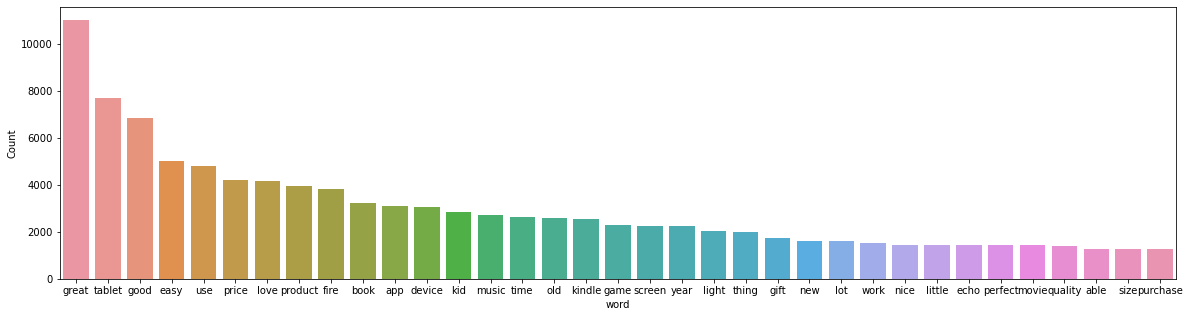

In [20]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

freq_words(df['reviews'], 35)

#### Building an LDA model

In [21]:
dictionary = corpora.Dictionary(reviews_2)


In [22]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]


In [23]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [24]:
lda_model.print_topics()


[(0,
  '0.169*"easy" + 0.158*"use" + 0.047*"great" + 0.035*"gift" + 0.034*"product" + 0.026*"friend" + 0.024*"home" + 0.024*"love" + 0.023*"command" + 0.022*"house"'),
 (1,
  '0.042*"fire" + 0.036*"device" + 0.035*"app" + 0.034*"cable" + 0.024*"good" + 0.019*"well" + 0.016*"speaker" + 0.011*"service" + 0.011*"apple" + 0.011*"fast"'),
 (2,
  '0.096*"fire" + 0.050*"new" + 0.049*"love" + 0.046*"old" + 0.042*"year" + 0.041*"smart" + 0.028*"kindle" + 0.017*"second" + 0.016*"wife" + 0.014*"happy"'),
 (3,
  '0.128*"great" + 0.087*"good" + 0.076*"product" + 0.041*"price" + 0.037*"box" + 0.031*"quality" + 0.029*"streaming" + 0.028*"tablet" + 0.027*"sound" + 0.026*"remote"'),
 (4,
  '0.090*"music" + 0.053*"movie" + 0.042*"stick" + 0.033*"great" + 0.031*"game" + 0.026*"play" + 0.025*"prime" + 0.025*"weather" + 0.024*"amazing" + 0.021*"love"'),
 (5,
  '0.058*"echo" + 0.047*"voice" + 0.038*"alexa" + 0.035*"thing" + 0.033*"question" + 0.032*"family" + 0.030*"fun" + 0.027*"control" + 0.026*"device" +

In [25]:
# Print the Keyword in the 10 topics
lda_model.print_topics()

[(0,
  '0.169*"easy" + 0.158*"use" + 0.047*"great" + 0.035*"gift" + 0.034*"product" + 0.026*"friend" + 0.024*"home" + 0.024*"love" + 0.023*"command" + 0.022*"house"'),
 (1,
  '0.042*"fire" + 0.036*"device" + 0.035*"app" + 0.034*"cable" + 0.024*"good" + 0.019*"well" + 0.016*"speaker" + 0.011*"service" + 0.011*"apple" + 0.011*"fast"'),
 (2,
  '0.096*"fire" + 0.050*"new" + 0.049*"love" + 0.046*"old" + 0.042*"year" + 0.041*"smart" + 0.028*"kindle" + 0.017*"second" + 0.016*"wife" + 0.014*"happy"'),
 (3,
  '0.128*"great" + 0.087*"good" + 0.076*"product" + 0.041*"price" + 0.037*"box" + 0.031*"quality" + 0.029*"streaming" + 0.028*"tablet" + 0.027*"sound" + 0.026*"remote"'),
 (4,
  '0.090*"music" + 0.053*"movie" + 0.042*"stick" + 0.033*"great" + 0.031*"game" + 0.026*"play" + 0.025*"prime" + 0.025*"weather" + 0.024*"amazing" + 0.021*"love"'),
 (5,
  '0.058*"echo" + 0.047*"voice" + 0.038*"alexa" + 0.035*"thing" + 0.033*"question" + 0.032*"family" + 0.030*"fun" + 0.027*"control" + 0.026*"device" +

#### Topics Visualization

In [26]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.090814 -0.223626       1        1  21.090784
3     -0.255196 -0.073090       2        1  18.853872
6      0.012284 -0.047377       3        1  15.172029
4      0.066387  0.142293       4        1  12.601955
2      0.082777 -0.200849       5        1  11.727627
5      0.265864  0.218016       6        1  10.333303
0     -0.262930  0.184633       7        1  10.220428, topic_info=          Term          Freq         Total Category  logprob  loglift
83        easy   4993.000000   4993.000000  Default  30.0000  30.0000
7          use   4664.000000   4664.000000  Default  29.0000  29.0000
22        fire   5822.000000   5822.000000  Default  28.0000  28.0000
25       great  10828.000000  10828.000000  Default  27.0000  27.0000
55        good   6189.000000   6189.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
25       great   1386.537842  10828.201172   Topic7  -3.0605   0.2254
79    purchase    377.174866   1211.091064   Topic7  -4.3623   1.1142
9         love    695.660461   4641.141602   Topic7  -3.7502   0.3829
1170      room    260.126587    851.759399   Topic7  -4.7339   1.0946
271       work    226.842850   1655.446167   Topic7  -4.8708   0.2932

[348 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
14        1  0.147965    able
14        3  0.143966    able
14        4  0.607855    able
14        5  0.099176    able
43        4  0.997950  access
...     ...       ...     ...
271       5  0.180012    work
271       7  0.137123    work
82        1  0.647056   worth
82        2  0.351733   worth
76        5  0.999566    year

[398 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 7, 5, 3, 6, 1])

#### Exploring the Data

In [27]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [28]:
df['reviews.text'].apply(lambda x: len(x.split(' '))).sum()


797442

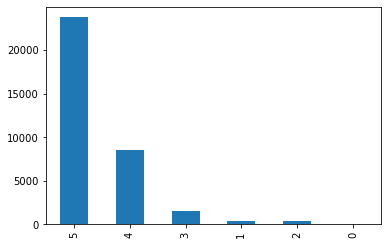

In [29]:
rate = ['0','1','2','3','4','5']
plt.figure(figsize= (6,4))
df['reviews.rating'].value_counts().plot(kind='bar');

In [30]:
X = df['reviews.text']
y = df['reviews.rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

#### Naive Bayes Classifier for Multinomial Models


In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
target_names = 1 or 2 or 3 or 4 or 5
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

%matplotlib inline
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names= rate))

accuracy 0.6978265050971341
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00       123
           2       0.00      0.00      0.00       114
           3       0.00      0.00      0.00       427
           4       0.53      0.03      0.06      2534
           5       0.70      1.00      0.82      7187

    accuracy                           0.70     10398
   macro avg       0.21      0.17      0.15     10398
weighted avg       0.61      0.70      0.58     10398



C:\Users\Alaa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
#Linear Support Vector Machine
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

%matplotlib inline

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names= rate))

accuracy 0.6912867859203693
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00       123
           2       0.00      0.00      0.00       114
           3       0.00      0.00      0.00       427
           4       0.20      0.00      0.00      2534
           5       0.69      1.00      0.82      7187

    accuracy                           0.69     10398
   macro avg       0.15      0.17      0.14     10398
weighted avg       0.53      0.69      0.57     10398



C:\Users\Alaa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
